In [11]:
from tensorflow.examples.tutorials.mnist import input_data

In [12]:
import tensorflow as tf
import numpy as np

In [28]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True) 
# Each image is stored as 1-dimensional array which can be accessed using mnist.train.image[index]
# Similarly the labels can be accessed using mnist.train.labels[index]
# enabling one_hot creates one hot encoding for each label.

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [29]:
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

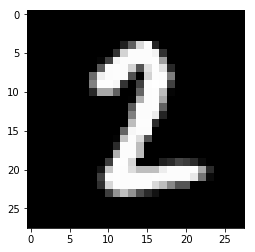

In [84]:
plt.imshow(np.reshape(mnist.train.images[0],[28,28]),cmap='gray') # accessing the first image from training data
plt.show()

In [86]:
mnist.train.labels[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [87]:
# Parameters
learning_rate = 0.01
epochs = 500
batch_size = 128
n_hidden_1 = 10
n_hidden_2 = 10
num_input = 784
num_classes = 10

In [88]:
# tf graph input
X = tf.placeholder(tf.float32,[None,num_input])
Y = tf.placeholder(tf.float32,[None,num_classes])

In [89]:
# creating dictionary to store weights and biases
weights = {
    'h1':tf.Variable(tf.random_normal([num_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,num_classes])),
}

biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden1])),
    'b2':tf.Variable(tf.random_normal([n_hidden2])),
    'out':tf.Variable(tf.random_normal([num_classes])),
}

In [90]:
# Creating the model
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    return out_layer

In [91]:
logits = neural_net(X)

In [92]:
# Defining loss and model optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

In [93]:
# Evaluating model performance
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

In [94]:
# Initializing the global variables
init = tf.global_variables_initializer()

In [95]:
# start training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(1,epochs+1):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op,feed_dict={X:batch_x,Y:batch_y})
        if epoch % 100 == 0 or epoch == 1:
            loss,acc = sess.run([loss_op,accuracy],feed_dict={X:batch_x,Y:batch_y})
            print("epoch" + str(epoch) + ",Minibatch loss=" + "{:.4f}".format(loss) + ",Training Accuracy="+"{:.3f}".format(acc))
            print("Optimization finished")
            print("Testing Accuracy:",sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

epoch1,Minibatch loss=1594.0144,Training Accuracy=0.164
Optimization finished
Testing Accuracy: 0.1469
epoch100,Minibatch loss=180.9144,Training Accuracy=0.844
Optimization finished
Testing Accuracy: 0.8812
epoch200,Minibatch loss=61.6442,Training Accuracy=0.883
Optimization finished
Testing Accuracy: 0.8756
epoch300,Minibatch loss=86.9222,Training Accuracy=0.859
Optimization finished
Testing Accuracy: 0.8893
epoch400,Minibatch loss=71.8191,Training Accuracy=0.875
Optimization finished
Testing Accuracy: 0.8704
epoch500,Minibatch loss=63.3633,Training Accuracy=0.852
Optimization finished
Testing Accuracy: 0.8888
